<a href="https://colab.research.google.com/github/Shantnu-Talokar/DeepLearningLab/blob/main/DLPractical5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original DataFrame Head:


,Gene,Sample,FPKM,description,tissue,metastasis
0,TSPAN6,CA.102548,0.93,CA.102548,breast tumor,yes
1,TNMD,CA.102548,0.00,CA.102548,breast tumor,yes
2,DPM1,CA.102548,0.00,CA.102548,breast tumor,yes
3,SCYL3,CA.102548,5.78,CA.102548,breast tumor,yes
4,C1orf112,CA.102548,2.83,CA.102548,breast tumor,yes



Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Gene         1048575 non-null  object 
 1   Sample       1048575 non-null  object 
 2   FPKM         1048575 non-null  float64
 3   description  1048575 non-null  object 
 4   tissue       1048575 non-null  object 
 5   metastasis   1048575 non-null  object 
dtypes: float64(1), object(5)
memory usage: 48.0+ MB


None


Pivoted DataFrame Head:


Gene,45352,45353,45354,45355,45356,45357,45358,45359,45360,45361,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,hsa-mir-1199,hsa-mir-150
Sample,,,,,,,,,,,,,,,,,,,,,
CA.102548,0.33,42.53,1.18,0.03,4.54,15.16,2.60,5.74,110.35,0.00,...,0.99,2.50,9.79,23.26,11.63,127.73,78.53,58.44,13.18,0.56
CA.104338,0.32,40.31,0.64,0.20,3.33,35.43,3.38,9.97,86.17,0.13,...,0.74,1.38,10.85,18.29,7.55,334.57,63.38,32.44,12.65,0.20
CA.105094,0.00,0.00,0.00,0.00,7.86,6.60,0.00,0.00,95.77,0.00,...,0.00,0.00,1.52,27.75,18.53,55.67,141.69,13.60,0.00,0.00
CA.109745,2.19,18.08,3.93,0.10,3.91,53.80,17.29,16.01,39.00,0.15,...,2.31,2.64,25.54,7.29,6.71,93.99,48.32,23.70,3.76,0.47
CA.1906415,6.27,37.93,3.52,0.05,6.98,51.57,21.54,11.76,19.69,0.00,...,2.01,2.04,37.91,4.73,7.06,230.03,39.70,23.35,7.48,0.70



Encoded Tissue Labels Head:


,breast tumor,normal breast tissue
Sample,,
CA.102548,True,False
CA.104338,True,False
CA.105094,True,False
CA.109745,True,False
CA.1906415,True,False



Data Shapes:
X_train shape: (41, 20246, 1)
X_test shape: (11, 20246, 1)
y_train shape: (41, 2)
y_test shape: (11, 2)

Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,370 (24.88 KB)

 Trainable params: 6,370 (24.88 KB)

 Non-trainable params: 0 (0.00 B)


Training Model...
Training complete.

Evaluating Model Performance...
Test Loss: 0.6320
Test Accuracy: 0.6364
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Precision: 0.7818
Recall: 0.6364
F1-score: 0.5606

Generated Predictions (Class Labels):
[0 0 0 0 1 0 0 0 0 0 0]


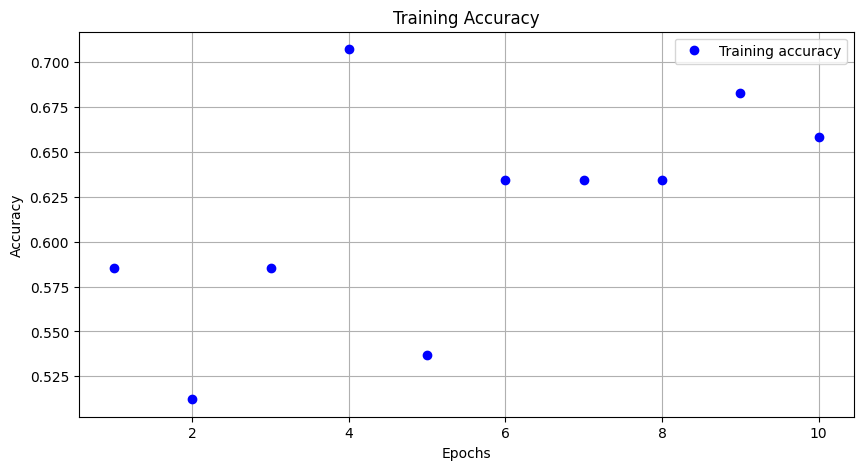

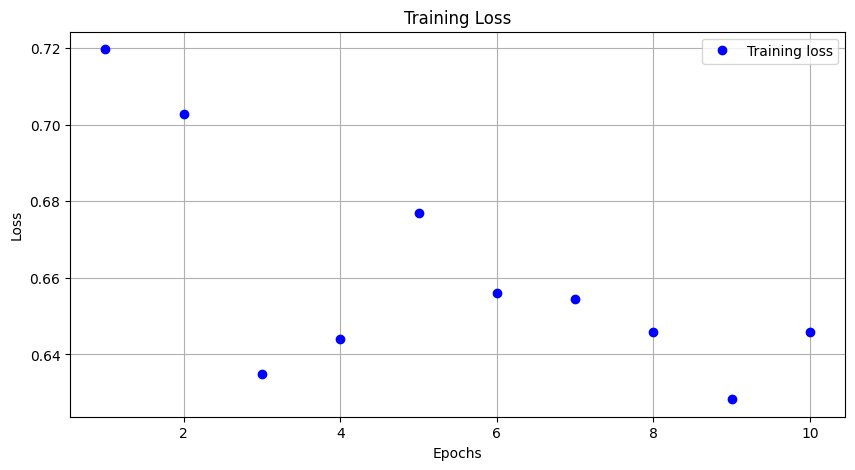

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
import matplotlib.pyplot as plt

# 1. Load and Explore Data
df = pd.read_csv('/content/process_data.csv')
print("Original DataFrame Head:")
display(df.head())
print("\nOriginal DataFrame Info:")
display(df.info())

# 2. Preprocess Data
pivoted_df = df.pivot(index='Sample', columns='Gene', values='FPKM')
pivoted_df = pivoted_df.fillna(0)
print("\nPivoted DataFrame Head:")
display(pivoted_df.head())

tissue_labels = df[['Sample', 'tissue']].drop_duplicates().set_index('Sample')
tissue_labels = tissue_labels.loc[pivoted_df.index]
tissue_encoded = pd.get_dummies(tissue_labels['tissue'])
print("\nEncoded Tissue Labels Head:")
display(tissue_encoded.head())

# 3. Prepare Data for RNN
X = pivoted_df
y = tissue_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

print("\nData Shapes:")
print("X_train shape:", X_train_reshaped.shape)
print("X_test shape:", X_test_reshaped.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# 4. Build RNN Model
model = Sequential()
model.add(SimpleRNN(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=y_train.shape[1], activation='sigmoid'))

print("\nModel Summary:")
model.summary()

# 5. Train RNN Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\nTraining Model...")
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, verbose=0) # verbose=0 to reduce output

print("Training complete.")

# 6. Evaluate Model Performance
print("\nEvaluating Model Performance...")
loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0) # verbose=0 to reduce output
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict class probabilities
y_pred_prob = model.predict(X_test_reshaped)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test.values, axis=1)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 7. Generate Predictions
print("\nGenerated Predictions (Class Labels):")
print(y_pred)

# 8. Visualize Training History
history_dict = history.history

acc = history_dict['accuracy']
loss = history_dict['loss']

epochs_range = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, acc, 'bo', label='Training accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()